In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
employee=pd.read_csv(r"C:\Users\fahme\Documents\SimpliLearn\Python with ML\Projcect1\Employee_Turnover_Analytics_project\HR_comma_sep.csv")
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Check for missing values
missing_values = employee.isnull().sum()

# Display missing values per column
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [6]:
# Convert categorical columns using Label Encoding
employee_encoded = employee.copy()
employee_encoded['sales'] = employee_encoded['sales'].astype('category').cat.codes
employee_encoded['salary'] = employee_encoded['salary'].astype('category').cat.codes

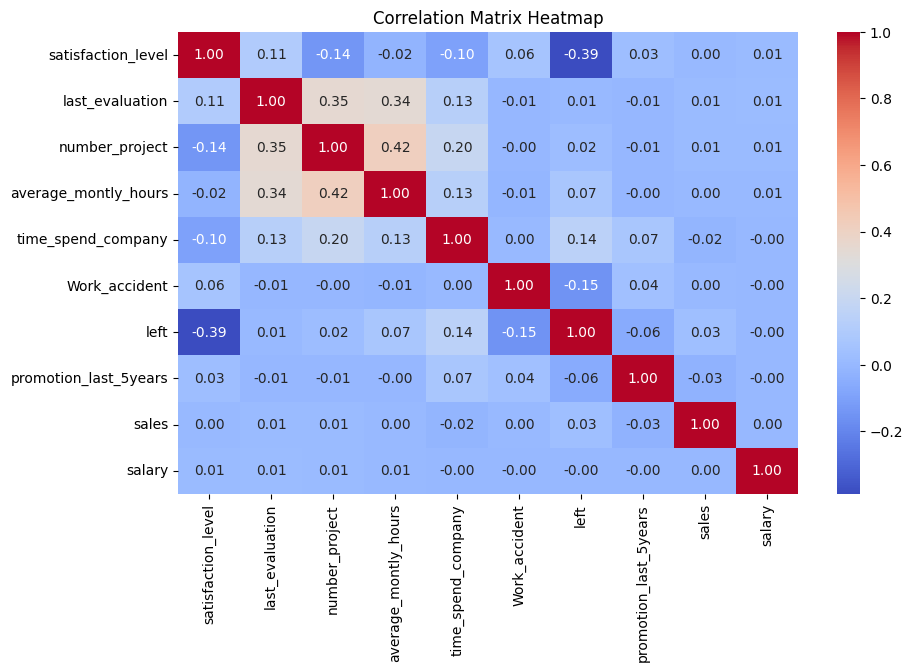

In [10]:
# Compute the correlation matrix
correlation_matrix = employee_encoded.corr()

# Set up the figure size
plt.figure(figsize=(10,6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Title
plt.title("Correlation Matrix Heatmap")
plt.show()

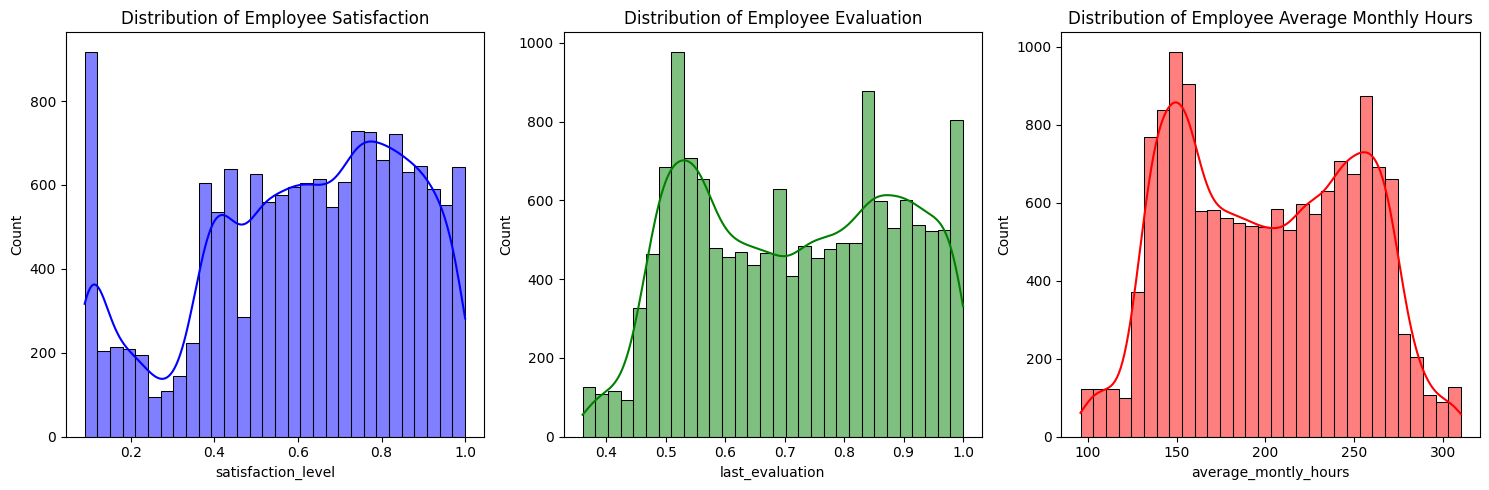

In [12]:
# Set figure size
plt.figure(figsize=(15, 5))

# Plot Satisfaction Level Distribution
plt.subplot(1, 3, 1)
sns.histplot(employee['satisfaction_level'], bins=30, kde=True, color='blue')
plt.title('Distribution of Employee Satisfaction')

# Plot Last Evaluation Distribution
plt.subplot(1, 3, 2)
sns.histplot(employee['last_evaluation'], bins=30, kde=True, color='green')
plt.title('Distribution of Employee Evaluation')

# Plot Average Monthly Hours Distribution
plt.subplot(1, 3, 3)
sns.histplot(employee['average_montly_hours'], bins=30,kde=True, color='red')
plt.title('Distribution of Employee Average Monthly Hours')

# Show the plots
plt.tight_layout()
plt.show()

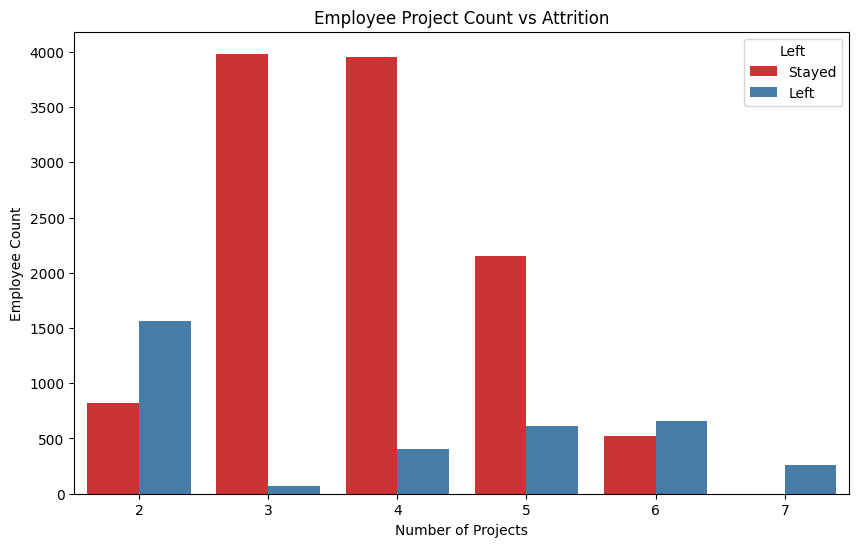

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=employee, palette='Set1')

plt.title('Employee Project Count vs Attrition')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [15]:
# Selecting relevant columns
left_employees = employee[employee['left'] == 1][['satisfaction_level', 'last_evaluation']]
left_employees

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


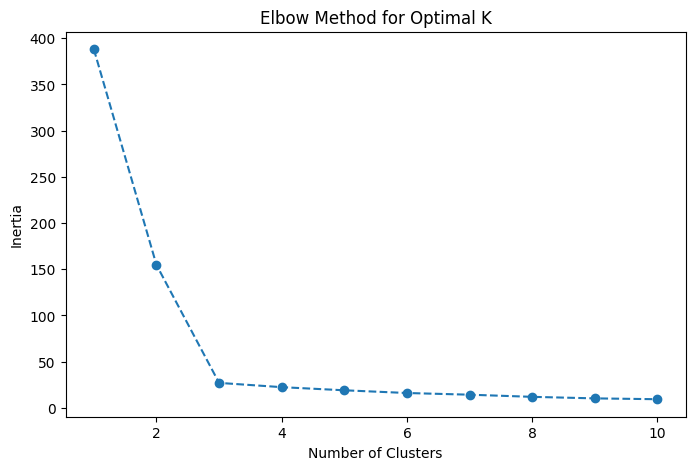

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(left_employees)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [55]:
# Creating a copy to avoid SettingWithCopyWarning
left_employees = employee[employee['left'] == 1][['satisfaction_level', 'last_evaluation']].copy()

# Applying K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
left_employees['Cluster'] = kmeans.fit_predict(left_employees)



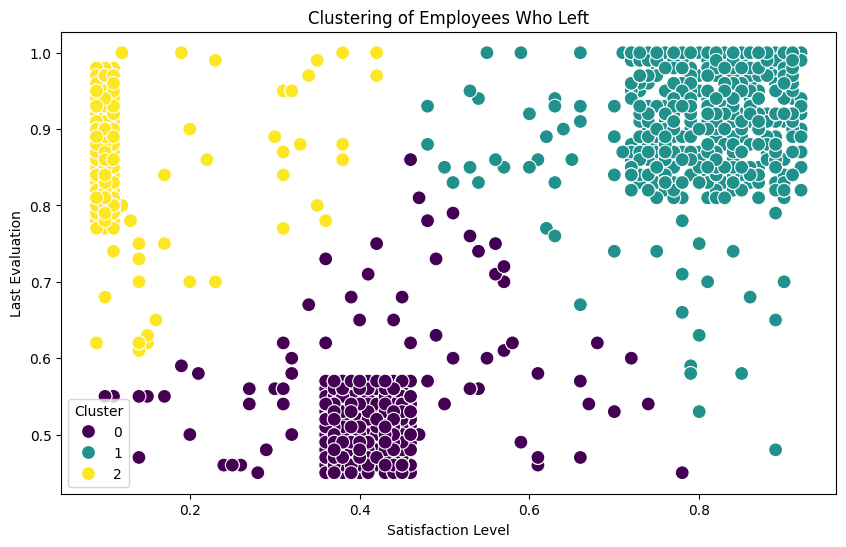

In [18]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='Cluster', data=left_employees, palette='viridis', s=100)

plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [57]:
# Filter employees who left
employee_left = employee[employee['left'] == 1].copy()  # This should correctly subset the data

# Select the required columns
X = employee_left[['satisfaction_level', 'last_evaluation']].copy()  # Ensuring X has the correct data


In [58]:


# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
employee_left['Cluster'] = kmeans.fit_predict(X)


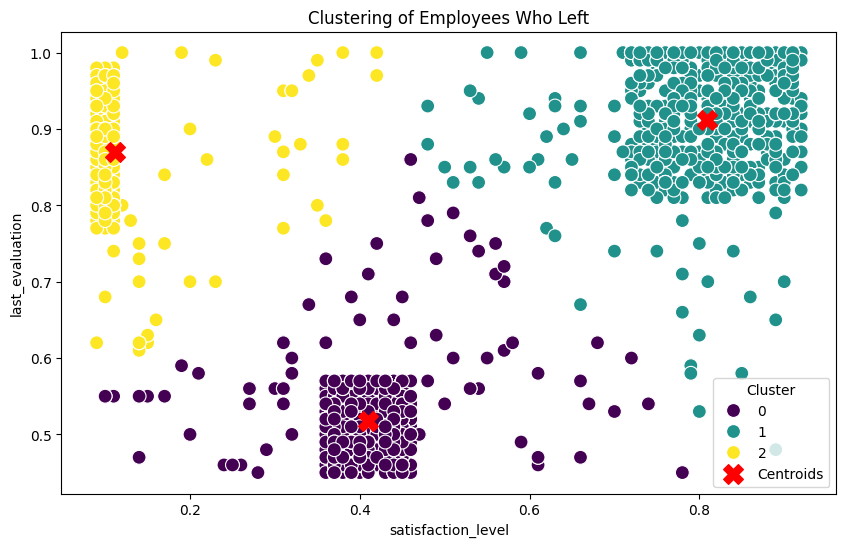

In [28]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_left, x='satisfaction_level', y='last_evaluation', 
                hue=employee_left['Cluster'], palette='viridis', s=100)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Clustering of Employees Who Left')
plt.legend(title="Cluster")
plt.show()


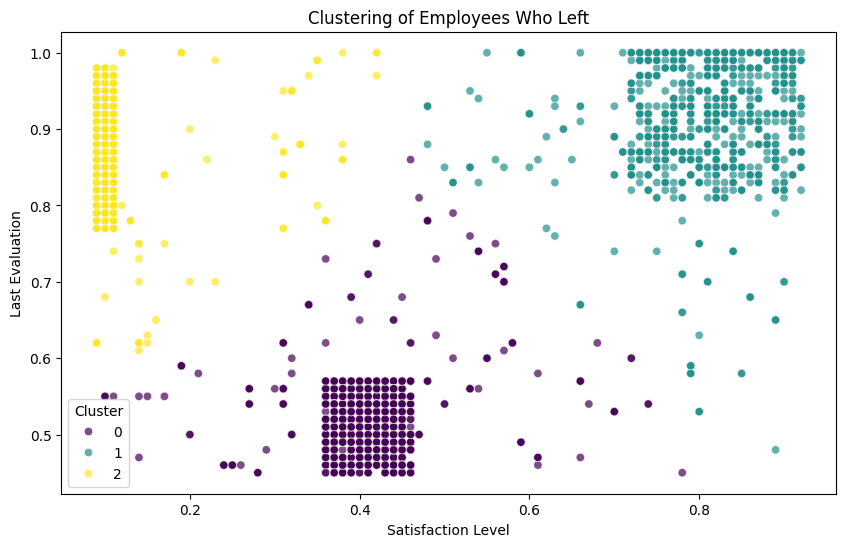

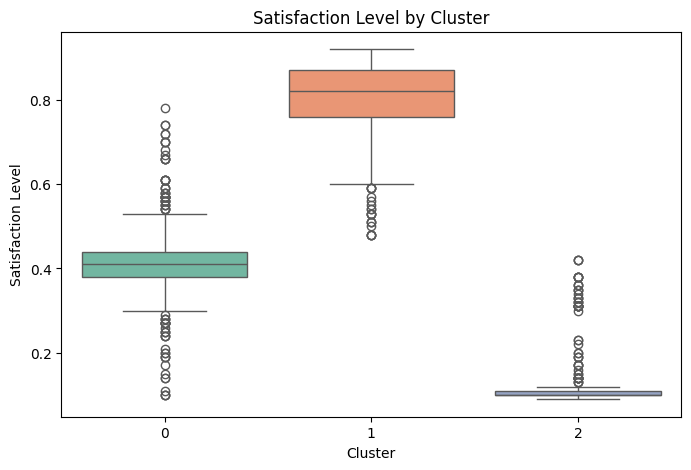

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='satisfaction_level', data=employee_left, hue="Cluster", palette='Set2')
plt.title('Satisfaction Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Satisfaction Level')
plt.legend([], [], frameon=False)  # Removes unnecessary legend
plt.show()


In [61]:
# Define categorical and numerical columns
categorical_cols = ['sales', 'salary']  # Replace with actual categorical column names
target_col = 'left'  # Define the target column

# Ensure numerical columns do not include categorical or target columns
numerical_cols = [col for col in employee.columns if col not in categorical_cols + [target_col]]

# Separate categorical and numerical data
cat_data = employee[categorical_cols]
num_data = employee[numerical_cols]

# Display first few rows to verify
print("Categorical Data:\n", cat_data.head())
print("\nNumerical Data:\n", num_data.head())


Categorical Data:
    sales  salary
0  sales     low
1  sales  medium
2  sales  medium
3  sales     low
4  sales     low

Numerical Data:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  
0                   3              0                      0  
1                   6              0                      0  
2                   4              0                      0  
3                   5              0                      0  
4                   3              0                      0  


In [62]:
# Convert categorical variables to numerical using get_dummies()
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True)

# Combine numerical and encoded categorical data
employee_encoded = pd.concat([num_data, cat_data_encoded], axis=1)


In [34]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = employee_encoded.drop(columns=['left'])  # Features
y = employee_encoded['left']  # Target

# Stratified train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123, stratify=y)


In [63]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to upsample the minority class
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())


Class distribution before SMOTE:
 left
0    9142
1    2857
Name: count, dtype: int64
Class distribution after SMOTE:
 left
0    9142
1    9142
Name: count, dtype: int64


In [36]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)


Confusion Matrix for Logistic Regression:


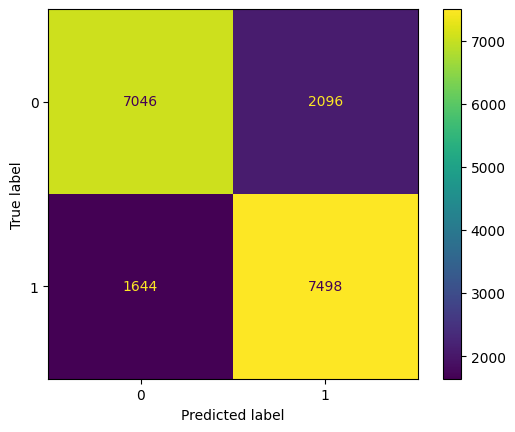

Confusion Matrix for Random Forest:


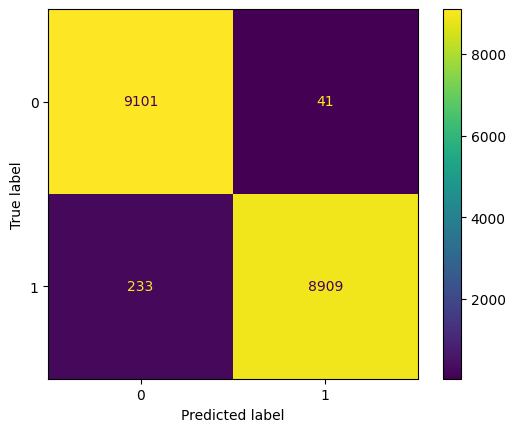

Confusion Matrix for Gradient Boosting:


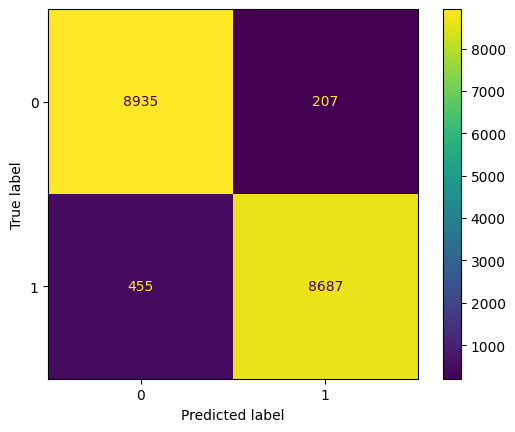

                     Precision    Recall  F1-score
Logistic Regression   0.781530  0.820171  0.800384
Random Forest         0.995419  0.974513  0.984855
Gradient Boosting     0.976726  0.950230  0.963296


In [64]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=123)
}

# Store results
model_results = {}

# Perform 5-fold CV for each model
for name, model in models.items():
    y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv)
    
    # Generate classification report
    report = classification_report(y_train_resampled, y_pred, output_dict=True)
    
    # Store model performance
    model_results[name] = {
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"]
    }
    
    # Display confusion matrix
    print(f"Confusion Matrix for {name}:")
    ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred)
    plt.show()

# Convert results to DataFrame for easy comparison
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)


In [65]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_train, y_train, model_name):
    # Get predicted probabilities
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

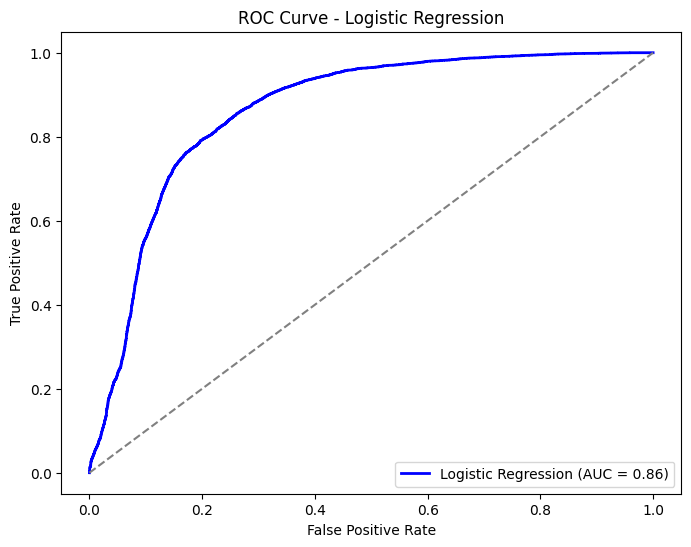

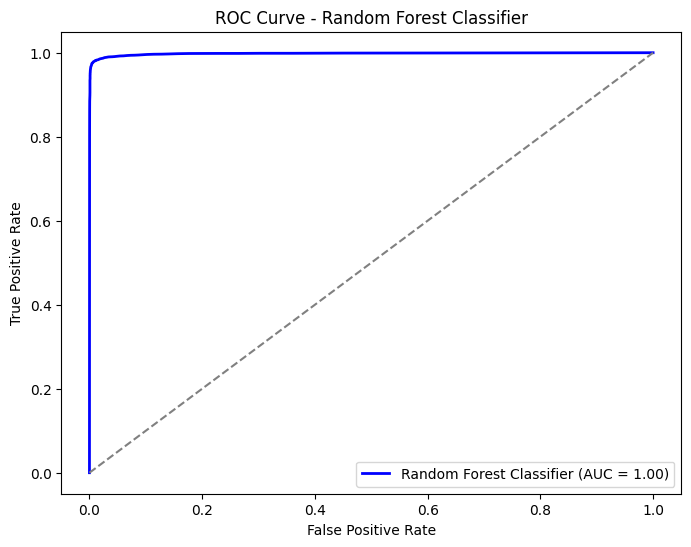

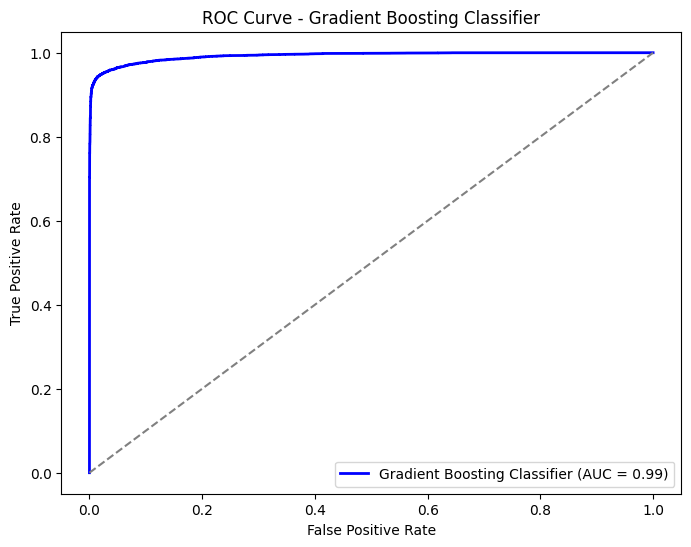

In [66]:
auc_log_reg = plot_roc_curve(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression")
auc_rf = plot_roc_curve(rf_model, X_train_resampled, y_train_resampled, "Random Forest Classifier")
auc_gb = plot_roc_curve(gb_model, X_train_resampled, y_train_resampled, "Gradient Boosting Classifier")


In [48]:
def plot_confusion_matrix(model, X_train, y_train, model_name):
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


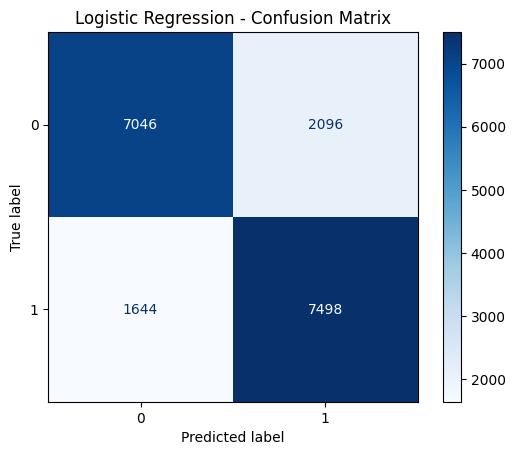

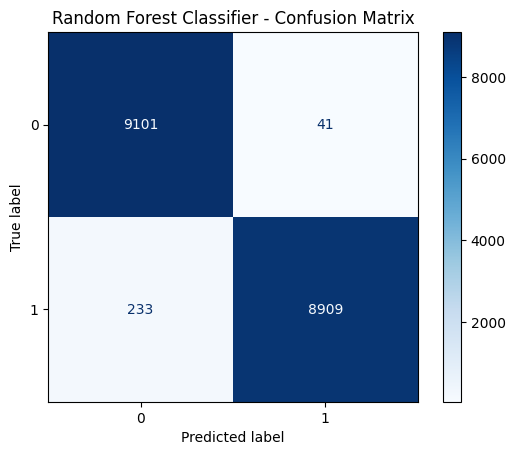

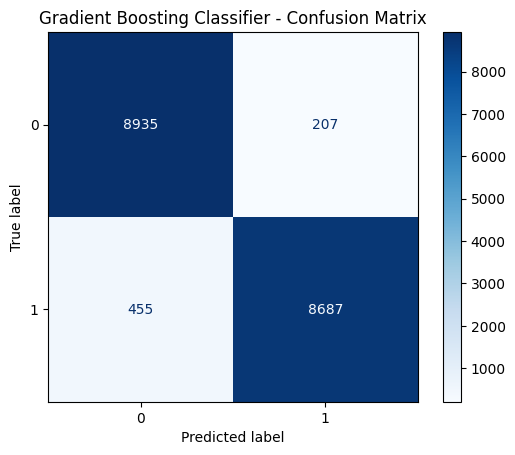

In [49]:
plot_confusion_matrix(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression")
plot_confusion_matrix(rf_model, X_train_resampled, y_train_resampled, "Random Forest Classifier")
plot_confusion_matrix(gb_model, X_train_resampled, y_train_resampled, "Gradient Boosting Classifier")


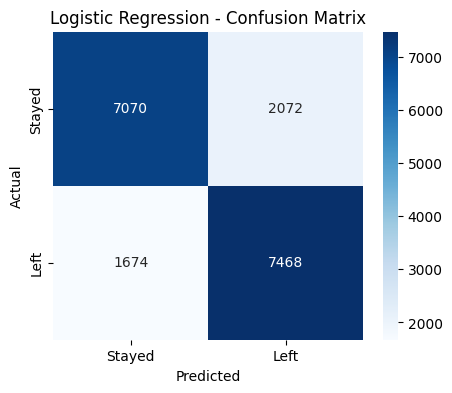

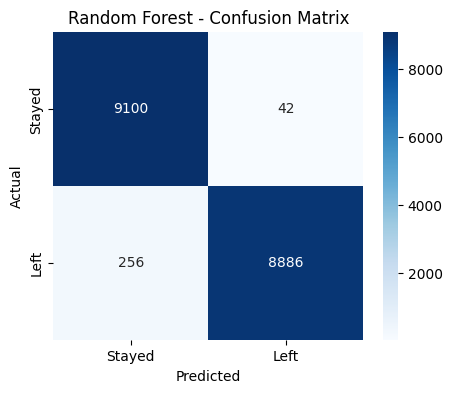

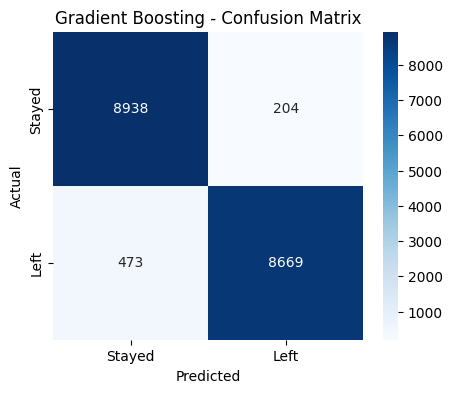

                 Model       AUC  Precision    Recall  F1-score
0  Logistic Regression  0.859206   0.782809  0.816889  0.799486
1        Random Forest  0.998046   0.995296  0.971997  0.983509
2    Gradient Boosting  0.992082   0.977009  0.948261  0.962420

 Best Model Based on AUC and Recall: 
Model        Random Forest
AUC               0.998046
Precision         0.995296
Recall            0.971997
F1-score          0.983509
Name: 1, dtype: object


In [68]:

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
# Function to evaluate a model
def evaluate_model(model, X_train, y_train, model_name):
    # Predict probabilities for ROC AUC
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]
    
    # Compute ROC AUC Score
    auc_score = roc_auc_score(y_train, y_pred_prob)

    # Get predictions for Confusion Matrix and Classification Report
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    
    # Compute Confusion Matrix
    cm = confusion_matrix(y_train, y_pred)

    # Compute Classification Report
    report = classification_report(y_train, y_pred, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1_score = report["1"]["f1-score"]

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    return {"Model": model_name, "AUC": auc_score, "Precision": precision, "Recall": recall, "F1-score": f1_score}

# Evaluate All Models
results = []
results.append(evaluate_model(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression"))
results.append(evaluate_model(rf_model, X_train_resampled, y_train_resampled, "Random Forest"))
results.append(evaluate_model(gb_model, X_train_resampled, y_train_resampled, "Gradient Boosting"))

# Convert results to DataFrame

results_df = pd.DataFrame(results)

# Print Comparison Table
print(results_df)

# Find the Best Model based on AUC and Recall
best_model = results_df.sort_values(by=["AUC", "Recall"], ascending=False).iloc[0]
print("\n Best Model Based on AUC and Recall: ")
print(best_model)


In [74]:
# Assuming these are your trained models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

# Get the best model's name
best_model_name = results_df.loc[results_df['AUC'].idxmax(), 'Model']

# Assign the actual model
best_model = models[best_model_name]


In [76]:
log_reg.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)
gb_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier(random_state=123)

In [77]:
# Predict probability of turnover for the test dataset
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of leaving

# Add predictions to test dataset
test_data = X_test.copy()
test_data['Turnover_Probability'] = y_proba
test_data['Actual_Left'] = y_test.values  # Actual labels

# Display employees with high probability of leaving
high_risk_employees = test_data.sort_values(by="Turnover_Probability", ascending=False)
high_risk_employees.head(10)  # Top 10 employees at risk


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,Turnover_Probability,Actual_Left
14851,0.37,0.52,2,128,3,0,0,False,True,False,False,False,False,False,False,False,True,False,1.0,1
550,0.11,0.96,6,298,4,0,0,False,False,False,False,False,False,True,False,False,True,False,1.0,1
14399,0.37,0.55,2,152,3,0,0,False,False,False,False,False,False,False,False,True,False,True,1.0,1
14713,0.11,0.87,7,282,5,0,0,False,False,False,False,False,False,False,False,True,True,False,1.0,1
1942,0.40,0.47,2,144,3,0,0,False,False,True,False,False,False,False,False,False,False,True,1.0,1
1119,0.44,0.50,2,138,3,0,0,False,False,False,False,False,False,False,True,False,False,True,1.0,1
227,0.44,0.54,2,149,3,0,0,False,False,True,False,False,False,False,False,False,True,False,1.0,1
14702,0.39,0.51,2,151,3,0,0,False,False,True,False,False,False,False,False,False,False,True,1.0,1
14515,0.89,0.87,5,255,5,0,0,True,False,False,False,False,False,False,False,False,False,True,1.0,1
129,0.37,0.45,2,151,3,0,0,False,False,False,False,False,False,False,True,False,True,False,1.0,1


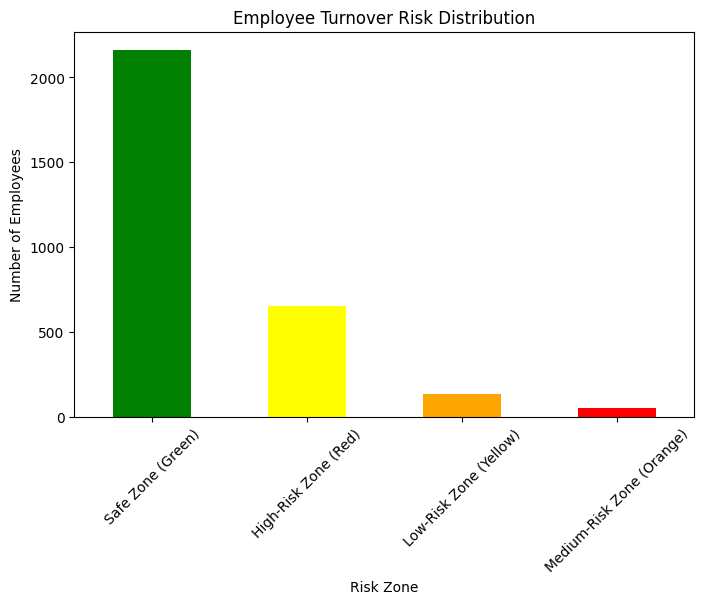

In [83]:
# Define function to categorize employees based on turnover probability
def categorize_employee(prob):
    if prob < 0.20:
        return "Safe Zone (Green)"
    elif 0.20 <= prob < 0.60:
        return "Low-Risk Zone (Yellow)"
    elif 0.60 <= prob < 0.90:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

# Apply function to categorize employees
test_data["Risk Zone"] = test_data["Turnover_Probability"].apply(categorize_employee)

# Display categorized employees
test_data.head(10)  # View first 10 employees with assigned risk zones

# Count employees in each risk zone
zone_counts = test_data["Risk Zone"].value_counts()

# Plot distribution of risk zones


plt.figure(figsize=(8, 5))
zone_counts.plot(kind="bar", color=["green", "yellow", "orange", "red"])
plt.title("Employee Turnover Risk Distribution")
plt.xlabel("Risk Zone")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()


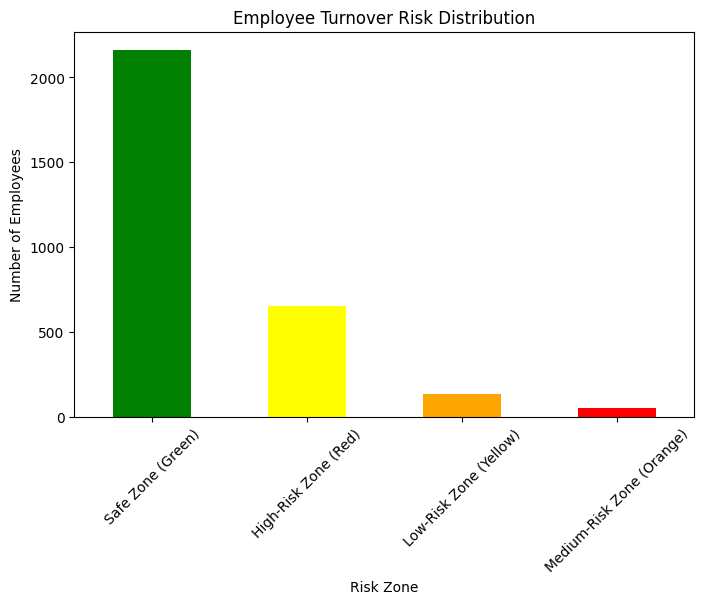

In [82]:

# Plot distribution of risk zones
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
zone_counts.plot(kind="bar", color=["green", "yellow", "orange", "red"])
plt.title("Employee Turnover Risk Distribution")
plt.xlabel("Risk Zone")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()
